# Using Convolutional neural networks to classify Sign language digits-KERAS

In [1]:
%matplotlib inline

from keras.preprocessing import image # Image processing 
import numpy as np # Numpy array manipulation
import os,shutil # Creating and copying directories
import matplotlib.pyplot as plt # Visualization

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
ogi_dir = '/Users/arth/Desktop/ML/projects/Sign Language/Dataset' # Source directory

In [3]:
# Create 3 directories (train ,test, validation) for ImageDataGenerator
train_dir = os.path.join(ogi_dir,'train')
test_dir = os.path.join(ogi_dir,'test')
validation_dir = os.path.join(ogi_dir,'validation')

def create_split(ogi_dir):
    if not os.path.exists(train_dir):
        os.mkdir(train_dir)
    if not os.path.exists(test_dir):
        os.mkdir(test_dir)
    if not os.path.exists(validation_dir):
        os.mkdir(validation_dir)

In [69]:
# Create classes (10) directories
def make_classes(train_dir, test_dir, validation_dir):
    for i in range(10):
        train_labels_dir = os.path.join(train_dir,str(i))
        if not os.path.exists(train_labels_dir):
            os.mkdir(train_labels_dir)
        test_labels_dir = os.path.join(test_dir,str(i))
        if not os.path.exists(test_labels_dir):
            os.mkdir(test_labels_dir)
        validation_labels_dir = os.path.join(validation_dir,str(i))
        if not os.path.exists(validation_labels_dir):
            os.mkdir(validation_labels_dir)

In [85]:
# Checking Number of images in each class
for d in os.listdir(ogi_dir):
    if d =='1':
        print(len(os.listdir(os.path.join(ogi_dir,d))))

206


In [4]:
train_size = 150 # Defining training size

In [98]:
def copy_data(ogi_dir, train_dir, test_dir, validation_dir):
    for i in range(10):
        src = os.path.join(ogi_dir,str(i))
        for f in os.listdir(src)[:train_size]:
            dest = os.path.join(train_dir,str(i))
            f_path = os.path.join(src,f)
            shutil.copy(f_path, dest)
        for f in os.listdir(src)[train_size:train_size+50]:
            dest = os.path.join(validation_dir,str(i))
            f_path = os.path.join(src,f)
            shutil.copy(f_path, dest)
        for f in os.listdir(src)[train_size+50:]:
            dest = os.path.join(test_dir,str(i))
            f_path = os.path.join(src,f)
            shutil.copy(f_path, dest)

In [104]:
# print(len(os.listdir(validation_labels_dir))) Validating on 50 samples

50


In [10]:
# Image Rescaling and preprocessing
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=60,
    horizontal_flip=True)

validation_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [11]:
train_generator = train_datagen.flow_from_directory(train_dir, target_size =(100,100), batch_size=16, class_mode= 'categorical')
validation_generator = validation_datagen.flow_from_directory(validation_dir, target_size =(100,100), batch_size=16, class_mode= 'categorical')
test_generator = test_datagen.flow_from_directory(test_dir, target_size =(100,100), batch_size=16, class_mode= 'categorical')

Found 1500 images belonging to 10 classes.
Found 500 images belonging to 10 classes.
Found 62 images belonging to 10 classes.


In [7]:
from keras import models,layers
from keras import optimizers

In [13]:
# Defining model
height = 100
width = 100
channels = 3
num_classes = 10

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(height, width, channels)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.2))
model.add(layers.Conv2D(64, (5, 5), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.2))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(num_classes, activation='softmax'))

model.load_weights('SignLanguage_88_S.h5')

model.compile(optimizer=optimizers.RMSprop(lr=1e-4),metrics=['acc'], loss='categorical_crossentropy')

In [14]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=50)

Epoch 1/30
100/100 [==============================] - 48s 480ms/step - loss: 0.5174 - acc: 0.8225 - val_loss: 0.5616 - val_acc: 0.8122
Epoch 2/30
100/100 [==============================] - 56s 559ms/step - loss: 0.5436 - acc: 0.8160 - val_loss: 0.5449 - val_acc: 0.8236
Epoch 3/30
100/100 [==============================] - 54s 542ms/step - loss: 0.5269 - acc: 0.8171 - val_loss: 0.6657 - val_acc: 0.7893
Epoch 4/30
100/100 [==============================] - 54s 544ms/step - loss: 0.5103 - acc: 0.8260 - val_loss: 0.6209 - val_acc: 0.8109
Epoch 5/30
100/100 [==============================] - 63s 632ms/step - loss: 0.4917 - acc: 0.8448 - val_loss: 0.6510 - val_acc: 0.7754
Epoch 6/30
100/100 [==============================] - 65s 648ms/step - loss: 0.4847 - acc: 0.8398 - val_loss: 0.5668 - val_acc: 0.8122
Epoch 7/30
100/100 [==============================] - 63s 629ms/step - loss: 0.5042 - acc: 0.8367 - val_loss: 0.5891 - val_acc: 0.8058
Epoch 8/30
100/100 [==============================] - 6

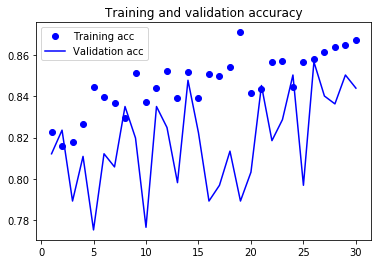

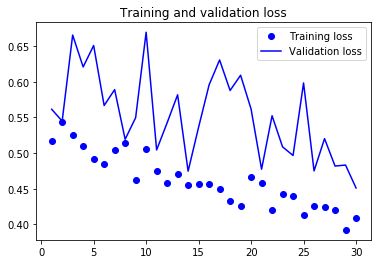

In [15]:
# Visualizing Loss and Accuracy
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [16]:
# Evaluating on Test set
model.evaluate_generator(test_generator)

[0.32163787753351275, 0.90322580645161288]

In [127]:
test_img_path = os.path.join(test_dir,'3')
test_img_path = os.path.join(test_img_path,os.listdir(test_img_path)[0])
print(test_img_path)

/Users/arth/Desktop/ML/projects/Sign Language/Dataset/test/3/IMG_4479.JPG


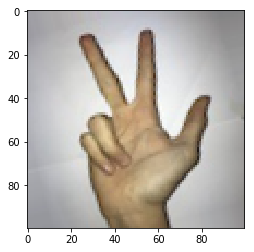

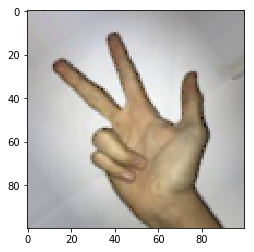

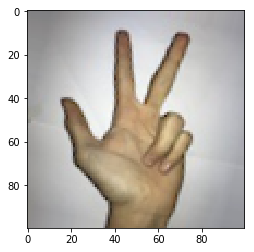

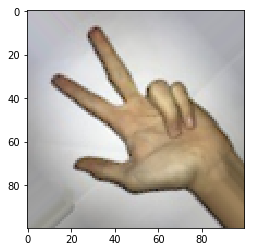

In [128]:
img = image.load_img(test_img_path,target_size = (100,100))
x = image.img_to_array(img)
x = x.reshape((1,) + x.shape)
i=0
for batch in train_datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break
plt.show()

In [129]:
np.argmax(model.predict(x))

3

In [17]:
model.save('SignLanguage_90_S.h5')

In [8]:
# Loading model for visualizing convnet filters and intermediate activations
model = models.load_model('SignLanguage_90_S.h5')

In [9]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 98, 98, 32)        896       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 49, 49, 32)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 49, 49, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 45, 45, 64)        51264     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 22, 22, 64)        0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 22, 22, 64)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 30976)             0         
__________

In [15]:
img_path = 'test.jpg'

img = image.load_img(img_path, target_size = (100,100))
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
img_tensor /= 255.
print(img_tensor.shape)

(1, 100, 100, 3)


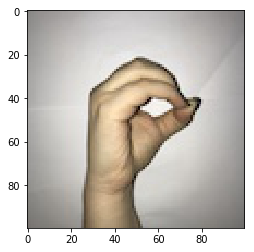

In [16]:
plt.imshow(img_tensor[0])

In [19]:
layers_output = [layer.output for layer in model.layers[:6]]
activation_model = models.Model(inputs=model.input, outputs=layers_output)

In [20]:
activations = activation_model.predict(img_tensor)
first_layer_activation = activations[0]
print(first_layer_activation.shape)

(1, 98, 98, 32)


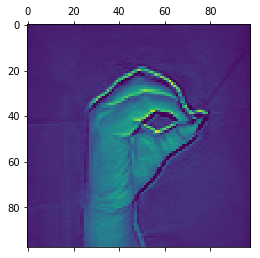

In [38]:
plt.matshow(first_layer_activation[0,:,:,17], cmap='viridis')

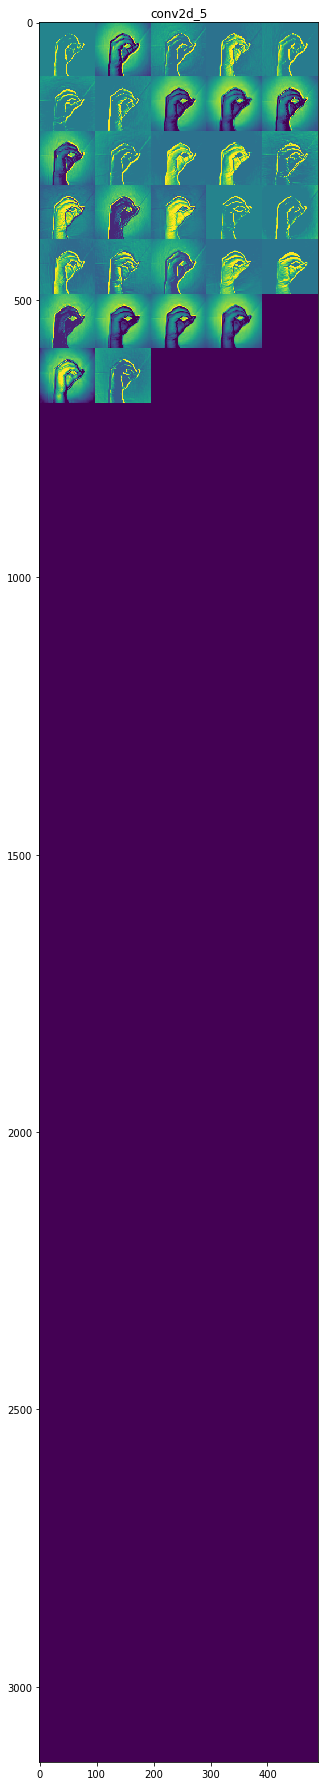

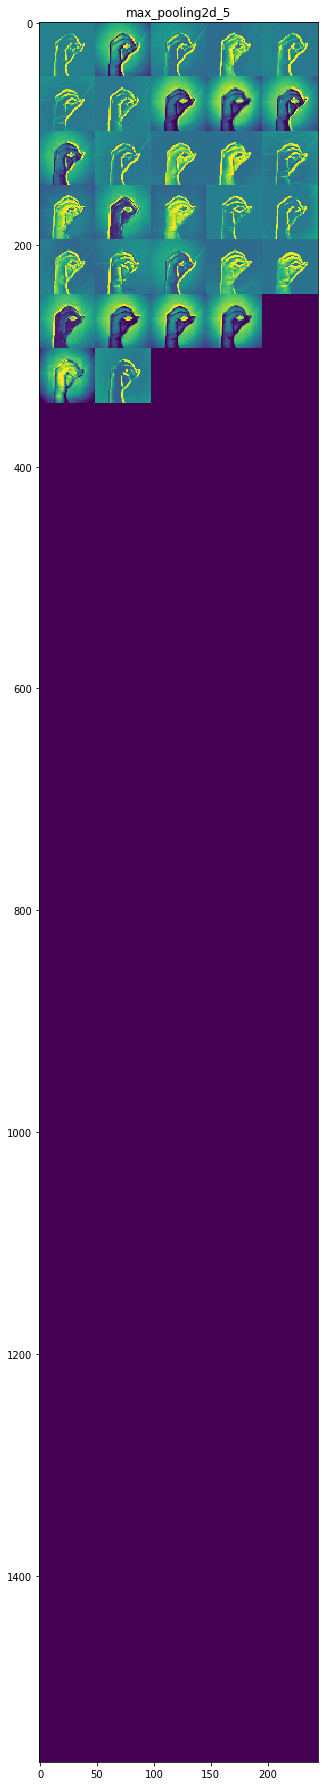

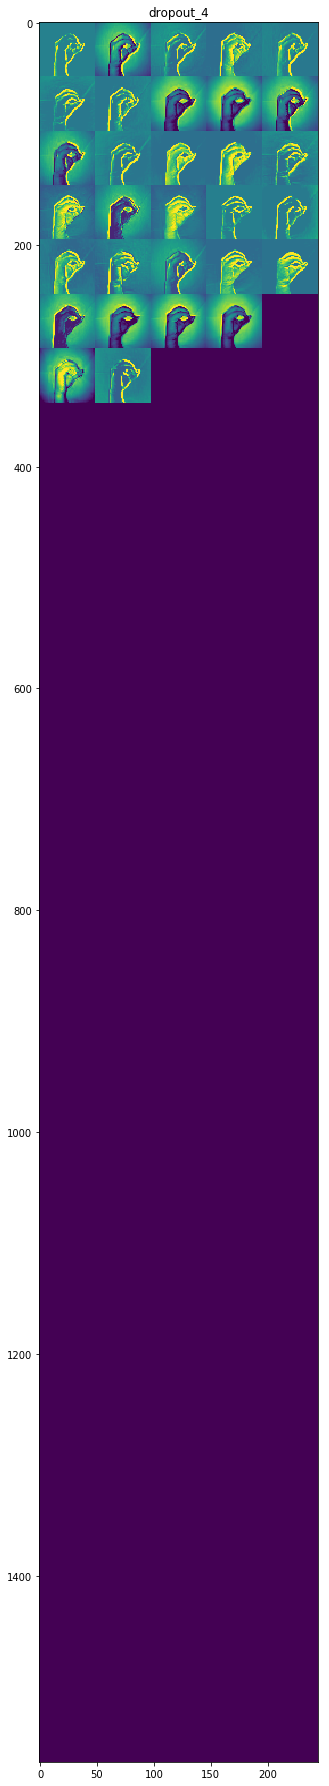

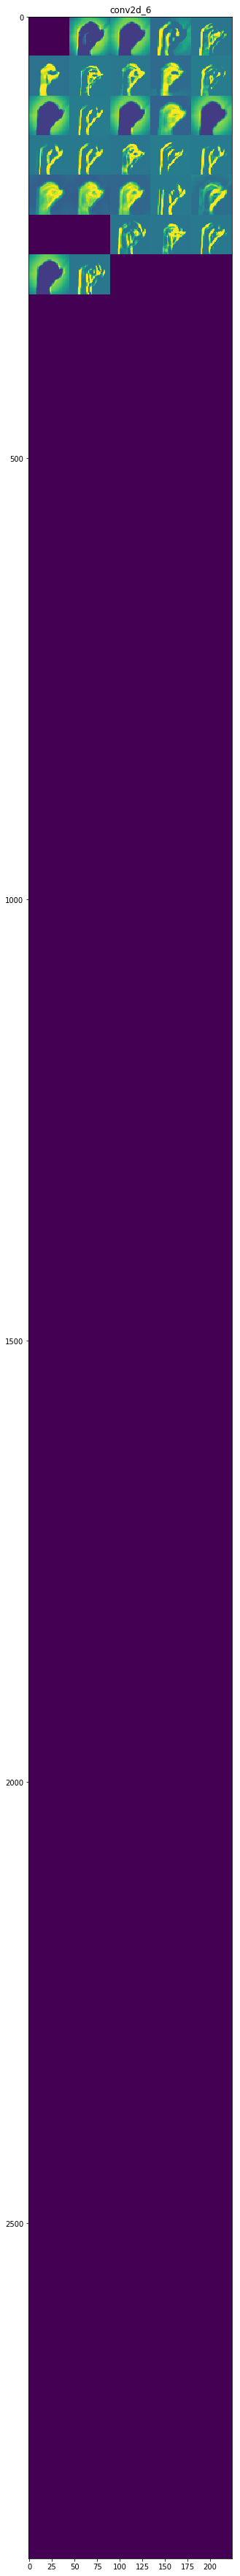

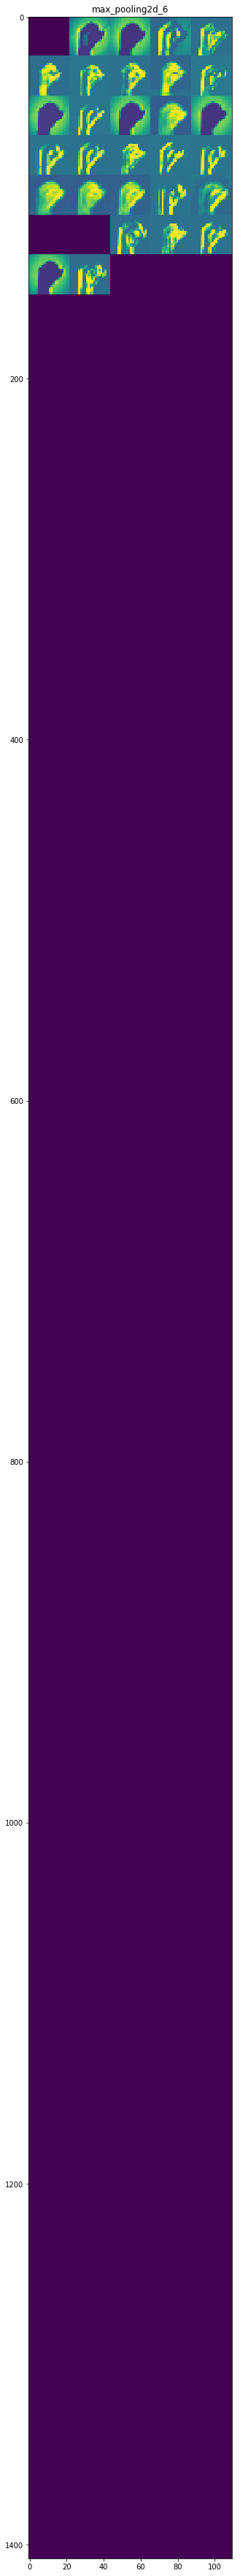

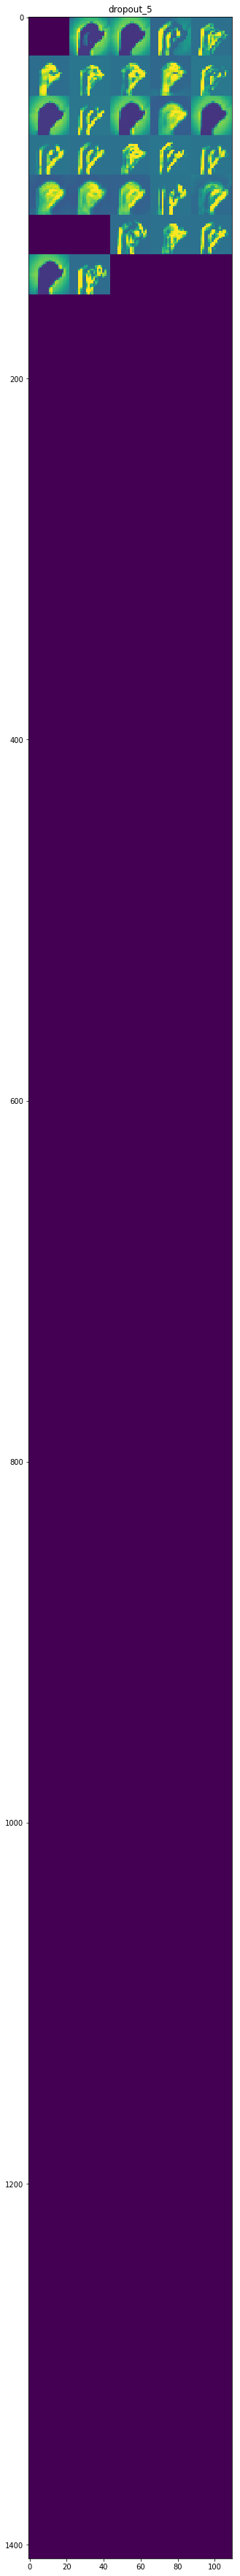

In [56]:
layer_names = []
for layer in model.layers[:6]:
    layer_names.append(layer.name)

images_per_row =5

for layer_name, layer_activation in zip(layer_names, activations):
    n_features = layer_activation.shape[-1]
    
    size = layer_activation.shape[1]
#     print(n_features)
    n_cols = n_features
    display_grid = np.zeros((size*n_cols, images_per_row*size))
#     print("grid shape:", display_grid.shape)
    for col in range(n_cols):
        for row in range(images_per_row):
#             print(row,col,images_per_row)
            if col*images_per_row + row >=32:
                continue
            channel_image = layer_activation[0,:,:,col*images_per_row + row ]
            channel_image -= channel_image.mean()
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image +=128
            channel_image = np.clip(channel_image,0,255).astype('uint8')
            display_grid[col*size:(col+1)*size, row*size: (row+1)*size] = channel_image
            
    scale = 1. / size
    plt.figure(figsize=(scale * display_grid.shape[1],
                        scale * display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')
    plt.savefig("{}.png".format(layer_name))

In [57]:
# Visualizing convnet filters using gradient ascent
from keras import backend as K

layer_name = 'conv2d_6'
filter_index = 0

layer_output = model.get_layer(layer_name).output
loss = K.mean(layer_output[:,:,:,filter_index]) 

In [58]:
grads = K.gradients(loss, model.input)[0]
grads /= (K.sqrt(K.mean(K.square(grads))) +1e-5)

(1, 100, 100, 3)


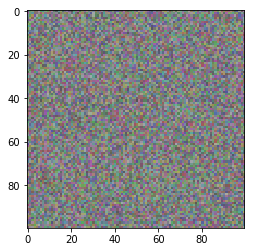

In [68]:
iterate = K.function([model.input], [loss,grads])
loss_value, grads_value = iterate([np.zeros((1,100,100,3))])

input_image= np.random.random((1,100,100,3)) *20 +128

step = 1.
for i in range(40):
    loss_value, grads_value = iterate([input_image])
    input_image += grads_value * step

depreprocessed_image = deprocess_image(input_image)
print(depreprocessed_image.shape)
plt.imshow(depreprocessed_image[0])

In [63]:
def deprocess_image(x):
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1
    
    x+= 0.5
    x = np.clip(x,0,1)
    
    x *= 255
    x = np.clip(x,0,255).astype('uint8')
    return x

In [69]:
def generate_pattern(layer_name, filter_index, size= 100):
    layer_output = model.get_layer(layer_name).output
    loss = K.mean(layer_output[:,:,:,filter_index]) 
    
    grads = K.gradients(loss, model.input)[0]
    grads /= (K.sqrt(K.mean(K.square(grads))) +1e-5)
    
    iterate = K.function([model.input], [loss,grads])
    loss_value, grads_value = iterate([np.zeros((1,100,100,3))])

    input_image= np.random.random((1,100,100,3)) *20 +128
    
    step = 1.
    for i in range(40):
        loss_value, grads_value = iterate([input_image])
        input_image += grads_value * step
        
    img = input_image[0]
    return deprocess_image(img)

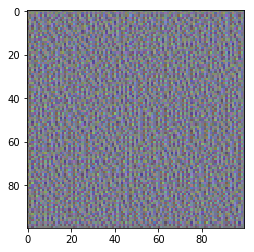

In [75]:
plt.imshow(generate_pattern('dropout_4',10))

In [84]:
# layer_name = 'conv2d_5'
# size = 100
# margin = 5

# results = np.zeros((8 * size + 7 * margin, 8 * size + 7 * margin, 3))

# for i in range(5):
#     for j in range(5):
#         filter_img = generate_pattern(layer_name,i+(j*8),size=size)
        
#         horizontal_start = i * size + i * margin
#         horizontal_end = horizontal_start + size
#         vertical_start = j * size + j * margin
#         vertical_end = vertical_start + size
#         results[horizontal_start: horizontal_end,
#                 vertical_start: vertical_end, :] = filter_img
# plt.figure(figsize = (20,20))
# plt.imshow(results)
# plt.savefig("filter-{}.png".format(layer_name))